# Linear Regression 

- Linear regression iş hayatımızda çok kullanamayız. Bu yüzden logistic regression kullanmak işlerimizde daha faydalı olacaktır.

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


c:\Users\Mete\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

In [2]:
print("describtion: ", boston["DESCR"])

describtion:  .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
       

In [3]:
import pandas as pd
boston_df = pd.DataFrame(boston["data"])
boston_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston_df.columns = boston['feature_names']
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston_df["PRICE"] = boston["target"]
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
import numpy as np
print(np.sum(np.isnan(boston_df)))
#find nun values - There are no null value

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


C:\Users\Mete\AppData\Local\Temp\ipykernel_9560\2999508125.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df["PRICE"])


<AxesSubplot: xlabel='PRICE', ylabel='Density'>

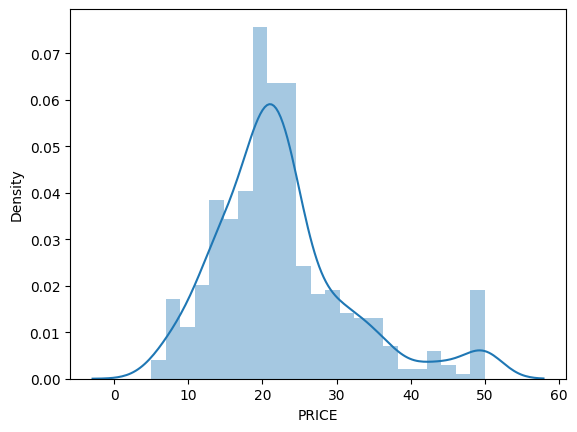

In [7]:
import seaborn as sns
sns.distplot(boston_df["PRICE"])

In [8]:
sns.pairplot(boston_df)
# columns'lar arasındaki bağlantıyı kolaylıkla görebiliriz.

# Prepare to Model



In [ ]:
# This will throw and error at import if haven't upgraded.
# from sklearn.cross_validation  import train_test_split
from sklearn.model_selection import train_test_split
# y is the dependent variable.
y = boston_df['PRICE']
# As we know, iloc is used to slice the array by index number. Here this is the matrix of
# independent variables.
X = boston_df.iloc[:, 0:13]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(354, 13) (152, 13) (354,) (152,)


## Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit( X_train, y_train )

LinearRegression()

## Evaluating the Model Results

In [ ]:
# Alternately, we can show the results in a dataframe using the zip command.
pd.DataFrame(list(zip(X.columns, lm.coef_)),
            columns=['features', 'estimatedCoeffs'])


,features,estimatedCoeffs
0,CRIM,-0.121310
1,ZN,0.044466
2,INDUS,0.011342
3,CHAS,2.511246
4,NOX,-16.231253
5,RM,3.859068
6,AGE,-0.009985
7,DIS,-1.500270
8,RAD,0.242143
9,TAX,-0.011072


## Cross Validation and Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, X_train, y_train, cv=8)
print("R2:", scores, "\n R2_avg: %0.2f (+/- %0.2f)" %
      (scores.mean(), scores.std() * 2))


R2: [0.69809776 0.6848557  0.61677678 0.74414545 0.75431003 0.62128711
 0.84406153 0.78197333] 
 R2_avg: 0.72 (+/- 0.15)


## Calculation of Null Model

In [ ]:
# Here we need to constructor our Base model
# This syntax multiplies a list by a number, genarating a list of length equal to that number.
# Then we can cast it as a Pandas series.
y_train_base = pd.Series([np.mean(y_train)] * y_train.size)
y_test_base = pd.Series([np.mean(y_train)] * y_test.size)
print(y_train_base.head(), '\n Size:', y_train_base.size)
print(y_test_base.head(), '\n Size:', y_test_base.size)


0    22.74548
1    22.74548
2    22.74548
3    22.74548
4    22.74548
dtype: float64 
 Size: 354
0    22.74548
1    22.74548
2    22.74548
3    22.74548
4    22.74548
dtype: float64 
 Size: 152


## Scoring of Null Model

In [ ]:
from sklearn.metrics import r2_score
r2_train_base= r2_score(y_train, y_train_base)
r2_train_reg = r2_score(y_train, lm.predict(X_train))

r2_test_base = r2_score(y_test, y_test_base)
r2_test_reg = r2_score(y_test, lm.predict(X_test))
print(r2_train_base, r2_train_reg,r2_test_base,r2_test_reg  )

0.0 0.7645451026942549 -0.0060197319476869016 0.673382550640016


In [ ]:
# total sum of squares
ss_tot_train = np.sum((y_train-np.mean(y_train))**2)
ss_res_train = np.sum((y_train-lm.predict(X_train))**2)
ss_reg_train = np.sum((lm.predict(X_train)-np.mean(y_train))**2)

r2_train_reg_manual = 1-(ss_res_train/ss_tot_train)

print(r2_train_reg, r2_train_reg_manual,
    ss_tot_train, ss_res_train, ss_reg_train)


0.7645451026942549 0.7645451026942549 30006.63776836158 7065.209814240268 22941.427954121507


## Predict Outcomes

In [ ]:
boston_df['PRICE_REG'] = lm.predict(boston_df.iloc[:, 0:13])
boston_df[['PRICE', 'PRICE_REG']].head()


,PRICE,PRICE_REG
0,24.0,30.290795
1,21.6,24.885615
2,34.7,30.471178
3,33.4,28.472236
4,36.2,27.811077


## Graph Outcomes

Text(0.5, 1.0, 'Real vs Predicted Housing Prices')

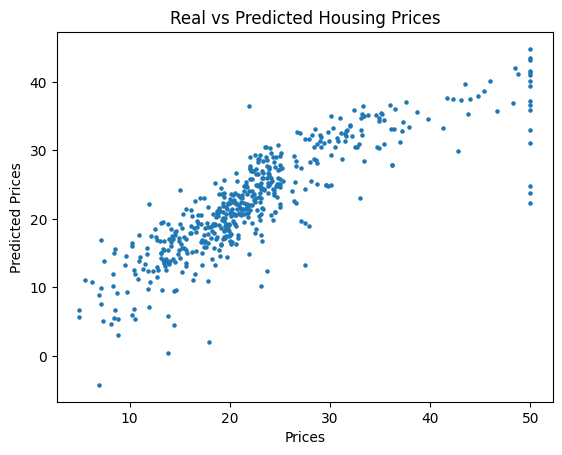

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter( boston_df['PRICE'], boston_df['PRICE_REG'], s=5 )
plt.xlabel( "Prices")
plt.ylabel( "Predicted Prices")
plt.title( "Real vs Predicted Housing Prices")

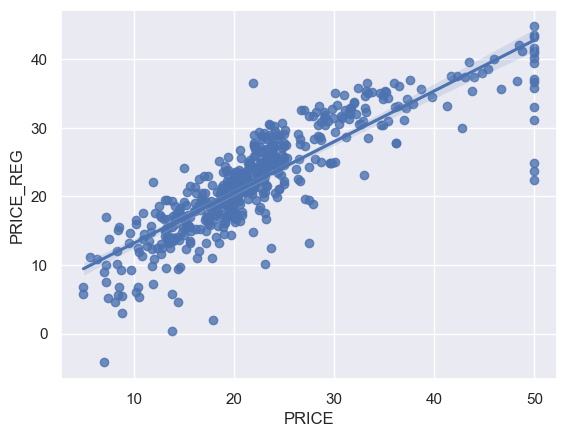

In [ ]:
#Let's make it look pretty with pickle
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="PRICE", y="PRICE_REG", data=boston_df[['PRICE','PRICE_REG']])

## Graph Residuals

Text(0, 0.5, 'Residuals')

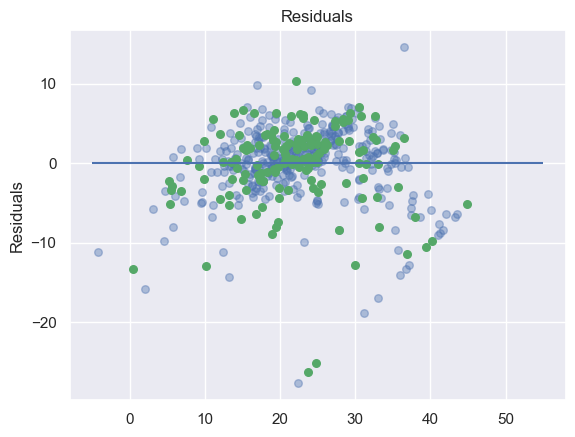

In [ ]:
#
plt.scatter( lm.predict(X_train), lm.predict(X_train) - y_train,
        c ='b', s=30, alpha=0.4 )
plt.scatter( lm.predict(X_test), lm.predict(X_test) - y_test,
        c ='g', s=30 )
#The expected error is 0. 
plt.hlines( y=0, xmin=-5, xmax=55)
plt.title( "Residuals" )
plt.ylabel( "Residuals" )

## Persistent Models

In [ ]:
# save the data
# boston_df.to_csv('boston.csv')


In [ ]:
import pickle
pickle.dump( lm, open( 'lm_reg_boston.p', 'wb' ) )

In [ ]:
# Load the pickled object.
lm_pickled = pickle.load(open("lm_reg_boston.p", "rb"))

lm_pickled.score(X_train, y_train)


0.7645451026942549